In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import numpy.random as random
import time
import IPython

In [2]:

k = 8.85419e-12


In [3]:
class FieldGenerator2D:

    def __init__(self, potential_function):
        self.potential = potential_function

    def generate_field_array(self, image_size=None, view_pos=0.0, horizontal_scale=1.0):
        
        if image_size is None:
            image_size = np.array([100, 100], dtype=np.int32)
        
        size = image_size[0] * image_size[1]
        
        indices = np.arange(size, dtype=np.int32)
        result = np.zeros_like(indices, dtype=np.float32)
        pixel_scale = 1.0*horizontal_scale/image_size[1]
        
        for i in range(size):
            _y = i // image_size[0]
            _x = i % image_size[0]

            y = view_pos[0] + (_y - image_size[0] / 2) * pixel_scale
            x = view_pos[1] + (_x - image_size[1] / 2) * pixel_scale
            r = np.array([x, y], dtype=np.float32)

            np.put(result, i, self.potential(r))
        
        return result.reshape(image_size)

In [4]:
def generate_field_image(potential, discrete_palette):
    return np.digitize(potential, discrete_palette, right=False)

def generate_discrete_palette(num_bins):
    if num_bins % 2 != 0:
        raise ValueError("Num bins is not even")
        
    n = num_bins // 2
    a = 20*2*np.log(10)/n
    
    base_range = np.exp(a*(np.arange(n) - n / 2.0))
    
    return np.concatenate(((-base_range)[::-1], base_range))

In [5]:
norm = np.linalg.norm
dot = np.dot
eps = 0.01

def point_potential(r, q, r0):
    r1 = r - r0
    #print(k*q/norm(r1))
    return k*q/(norm(r1) + eps)

def rod_potential(r, n, r0):
    #r1 = np.abs(norm(r0) - dot(r, r0)/norm(r0))
    r1 = r - r0
    return -2*k*n*np.log(norm(r1) + eps)

def finite_rod_potential(r, n, r0, r1):
    pass

class CompositePotential:
    
    def __init__(self, ):
        self.potentials = []
        self.args = []
    
    def calc_potential(self, r):
        p = 0.0
        for i in range(len(self.potentials)):
            p += self.potentials[i](r, *(self.args[i]))
        return p
    
    def add_point(self, q, r0):
        self.potentials.append(point_potential)
        self.args.append([q, r0])
    
    def add_rod(self, n, r0):
        self.potentials.append(point_potential)
        self.args.append([n, r0])


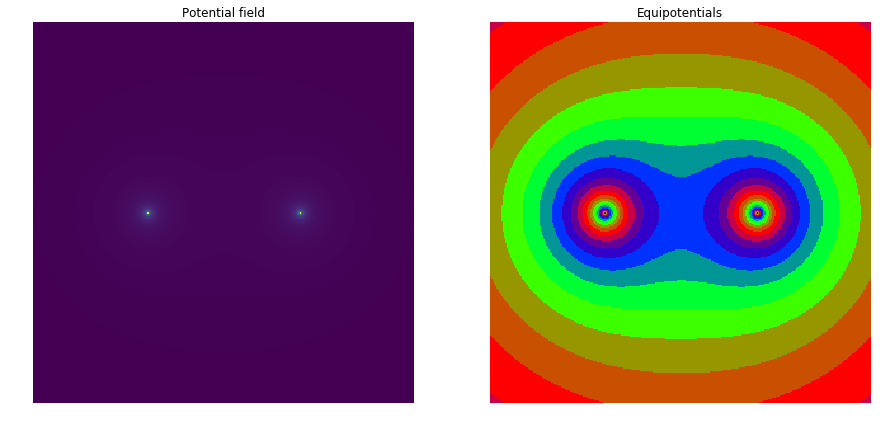

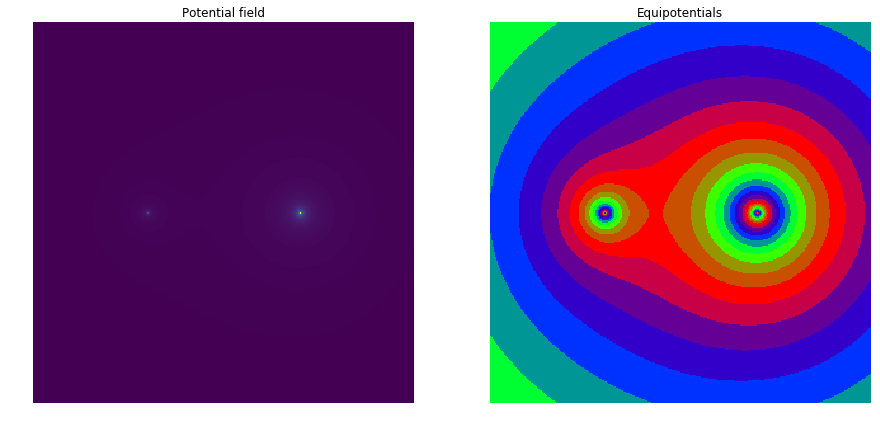

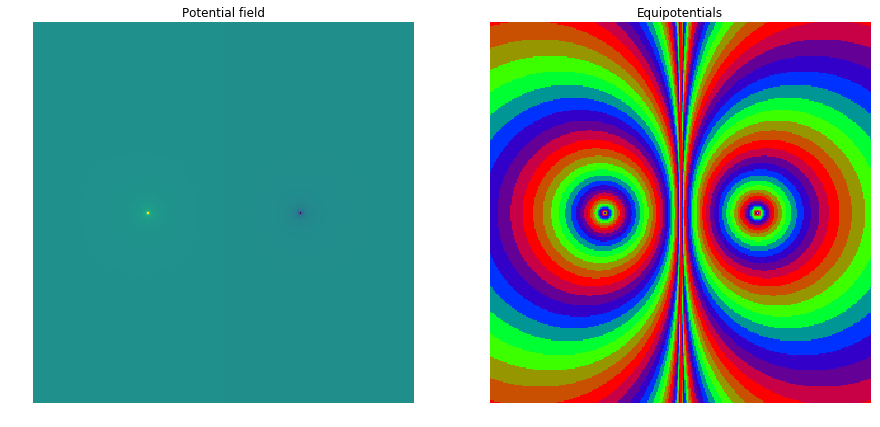

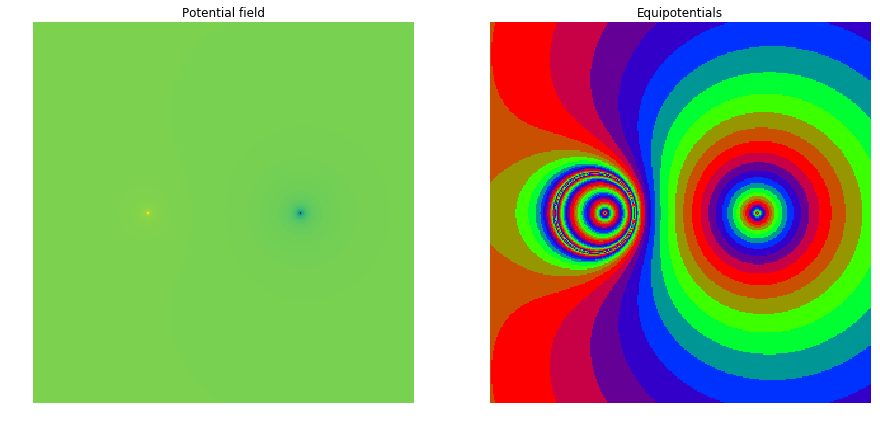

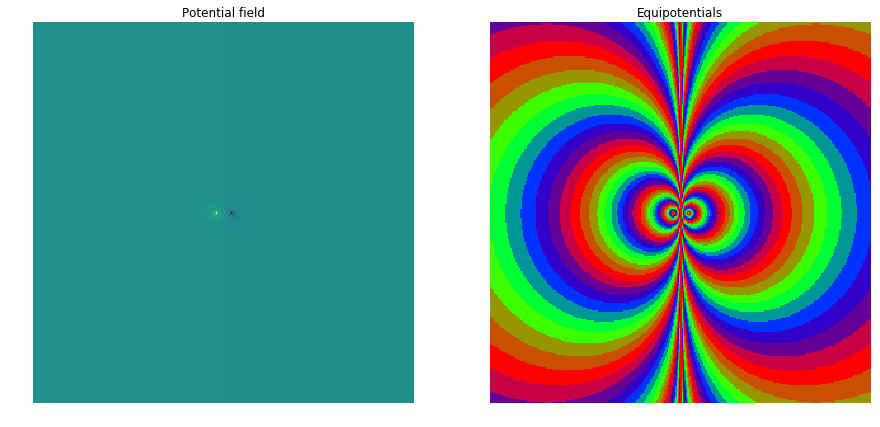

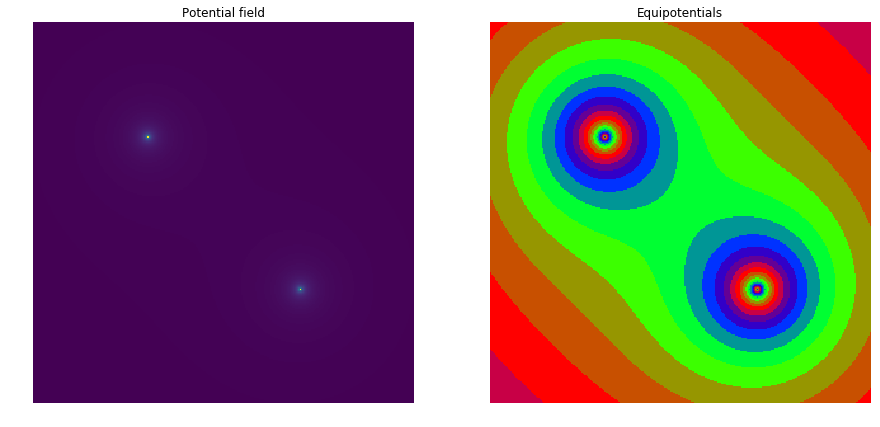

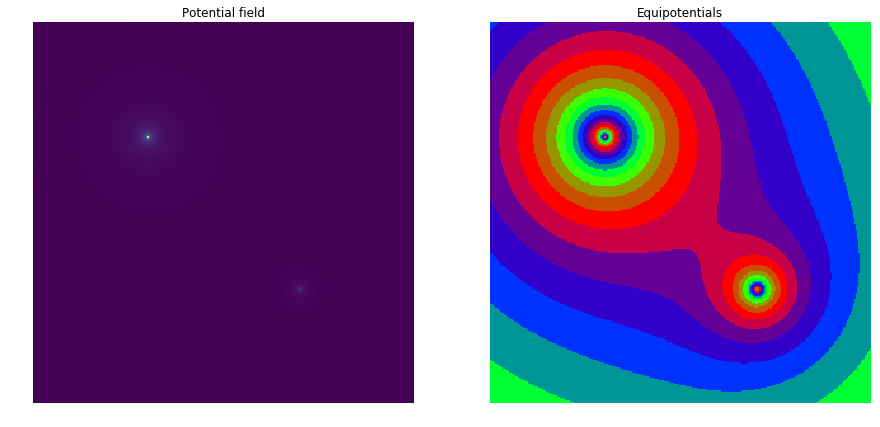

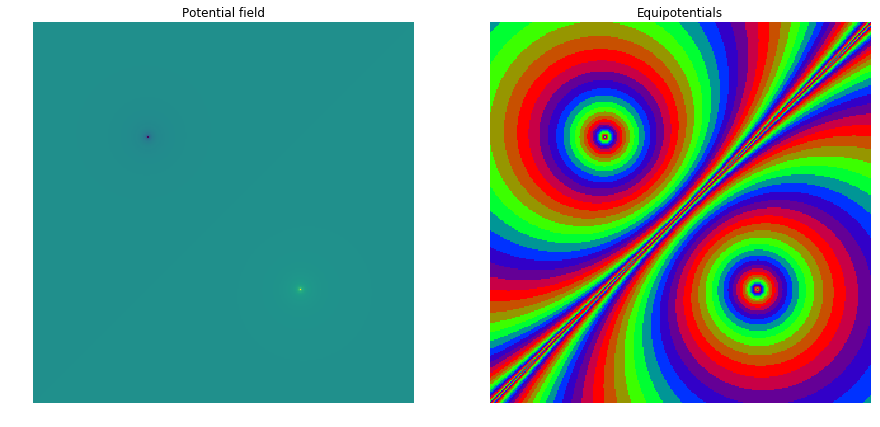

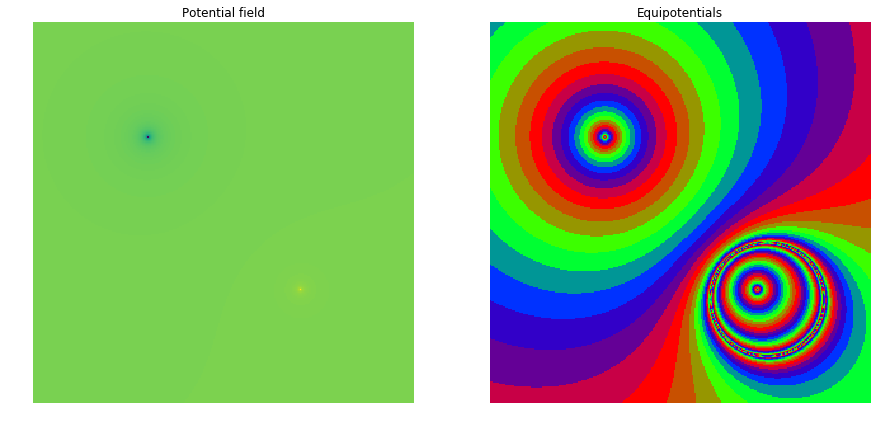

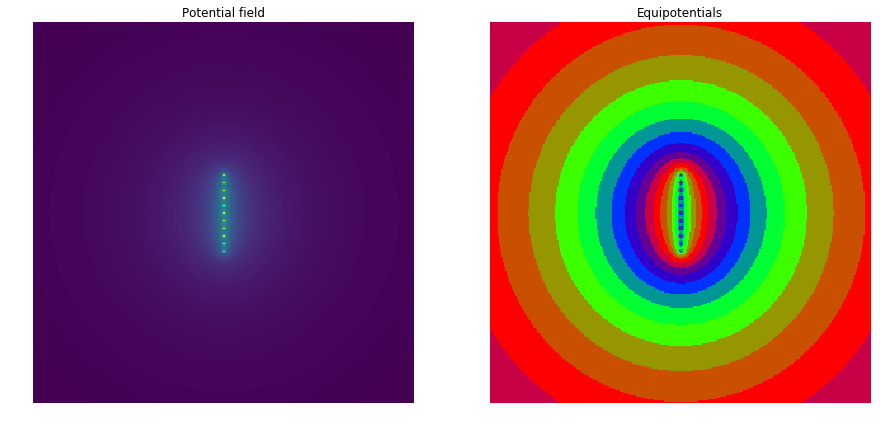

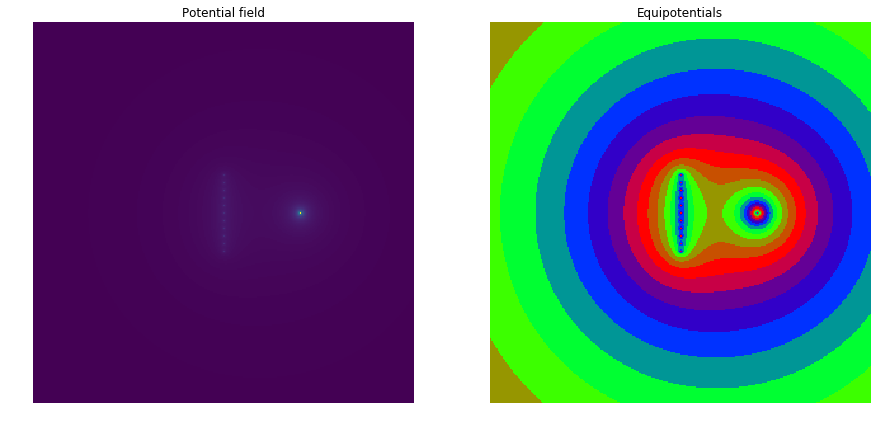

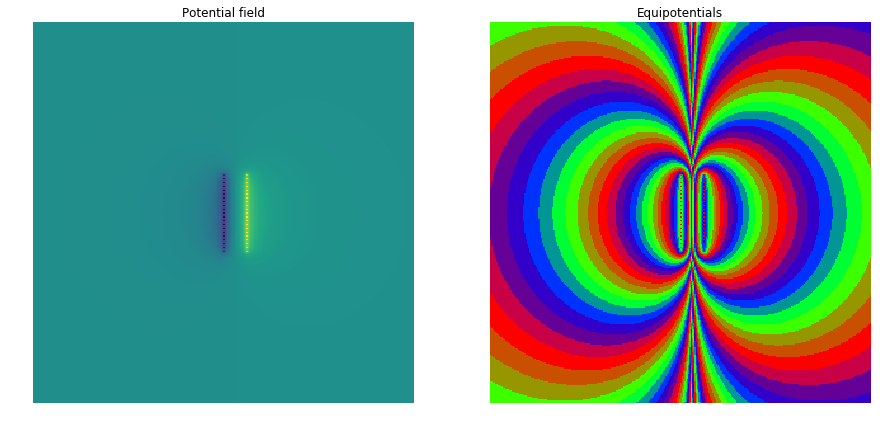

In [6]:
potentials = []


p = CompositePotential()
p.add_point(1.0, [ 1.0, 0.0])
p.add_point(1.0, [-1.0, 0.0])
potentials.append(p)

p = CompositePotential()
p.add_point(4.0, [ 1.0, 0.0])
p.add_point(1.0, [-1.0, 0.0])
potentials.append(p)

p = CompositePotential()
p.add_point(-1.0, [ 1.0, 0.0])
p.add_point( 1.0, [-1.0, 0.0])
potentials.append(p)

p = CompositePotential()
p.add_point(-4.0, [ 1.0, 0.0])
p.add_point( 1.0, [-1.0, 0.0])
potentials.append(p)



p = CompositePotential()
p.add_point(-1.0, [ 0.1, 0.0])
p.add_point( 1.0, [-0.1, 0.0])
potentials.append(p)



p = CompositePotential()
p.add_point(1.0, [  1.0,  1.0])
p.add_point(1.0, [ -1.0, -1.0])
potentials.append(p)

p = CompositePotential()
p.add_point(1.0, [  1.0,  1.0])
p.add_point(4.0, [ -1.0, -1.0])
potentials.append(p)

p = CompositePotential()
p.add_point( 1.0, [  1.0,  1.0])
p.add_point(-1.0, [ -1.0, -1.0])
potentials.append(p)

p = CompositePotential()
p.add_point( 1.0, [  1.0,  1.0])
p.add_point(-4.0, [ -1.0, -1.0])
potentials.append(p)




p = CompositePotential()
p.add_point( 1.0, [  0.0,  0.0])
p.add_point( 1.0, [  0.0,  0.1])
p.add_point( 1.0, [  0.0,  0.2])
p.add_point( 1.0, [  0.0,  0.3])
p.add_point( 1.0, [  0.0,  0.4])
p.add_point( 1.0, [  0.0,  0.5])
p.add_point( 1.0, [  0.0,  -0.1])
p.add_point( 1.0, [  0.0,  -0.2])
p.add_point( 1.0, [  0.0,  -0.3])
p.add_point( 1.0, [  0.0,  -0.4])
p.add_point( 1.0, [  0.0,  -0.5])
potentials.append(p)



p = CompositePotential()
p.add_point( 1.0, [  0.0,  0.0])
p.add_point( 1.0, [  0.0,  0.1])
p.add_point( 1.0, [  0.0,  0.2])
p.add_point( 1.0, [  0.0,  0.3])
p.add_point( 1.0, [  0.0,  0.4])
p.add_point( 1.0, [  0.0,  0.5])
p.add_point( 1.0, [  0.0,  -0.1])
p.add_point( 1.0, [  0.0,  -0.2])
p.add_point( 1.0, [  0.0,  -0.3])
p.add_point( 1.0, [  0.0,  -0.4])
p.add_point( 1.0, [  0.0,  -0.5])

p.add_point( 11.0, [1.0,  0])
potentials.append(p)



p = CompositePotential()

p.add_point( 1.0, [  0.3,  0.00])
p.add_point( 1.0, [  0.3,  0.05])
p.add_point( 1.0, [  0.3,  0.10])
p.add_point( 1.0, [  0.3,  0.15])
p.add_point( 1.0, [  0.3,  0.20])
p.add_point( 1.0, [  0.3,  0.25])
p.add_point( 1.0, [  0.3,  0.30])
p.add_point( 1.0, [  0.3,  0.35])
p.add_point( 1.0, [  0.3,  0.40])
p.add_point( 1.0, [  0.3,  0.45])
p.add_point( 1.0, [  0.3,  0.50])
p.add_point( 1.0, [  0.3,  -0.05])
p.add_point( 1.0, [  0.3,  -0.10])
p.add_point( 1.0, [  0.3,  -0.15])
p.add_point( 1.0, [  0.3,  -0.20])
p.add_point( 1.0, [  0.3,  -0.25])
p.add_point( 1.0, [  0.3,  -0.30])
p.add_point( 1.0, [  0.3,  -0.35])
p.add_point( 1.0, [  0.3,  -0.40])
p.add_point( 1.0, [  0.3,  -0.45])
p.add_point( 1.0, [  0.3,  -0.50])

p.add_point( -1.0, [  0.0,  0.00])
p.add_point( -1.0, [  0.0,  0.05])
p.add_point( -1.0, [  0.0,  0.10])
p.add_point( -1.0, [  0.0,  0.15])
p.add_point( -1.0, [  0.0,  0.20])
p.add_point( -1.0, [  0.0,  0.25])
p.add_point( -1.0, [  0.0,  0.30])
p.add_point( -1.0, [  0.0,  0.35])
p.add_point( -1.0, [  0.0,  0.40])
p.add_point( -1.0, [  0.0,  0.45])
p.add_point( -1.0, [  0.0,  0.50])
p.add_point( -1.0, [  0.0,  -0.05])
p.add_point( -1.0, [  0.0,  -0.10])
p.add_point( -1.0, [  0.0,  -0.15])
p.add_point( -1.0, [  0.0,  -0.20])
p.add_point( -1.0, [  0.0,  -0.25])
p.add_point( -1.0, [  0.0,  -0.30])
p.add_point( -1.0, [  0.0,  -0.35])
p.add_point( -1.0, [  0.0,  -0.40])
p.add_point( -1.0, [  0.0,  -0.45])
p.add_point( -1.0, [  0.0,  -0.50])
potentials.append(p)


discrete_palette = generate_discrete_palette(1000)

colors = np.array([[255,0,0],
                   [200,80,0],
                   [150,150,0],
                   [60,255,0],
                   [0,255,50],
                   [0,150,150],
                   [0,50,255],
                   [50,0,200],
                   [100,0,150],
                   [200,0,70]], dtype=np.uint8)

colormap = colors[np.remainder(np.arange(1000), 10)]
colormap = colormap.reshape(colormap.size)


for potential in potentials:
    
    potential = potential.calc_potential
    potential_field = FieldGenerator2D(potential).generate_field_array((300, 300), (0, 0), 5.0)

    field_image = generate_field_image(potential_field, discrete_palette)

    r = colormap[field_image*3 + 0]
    g = colormap[field_image*3 + 1]
    b = colormap[field_image*3 + 2]
    field_image = np.stack((r,g,b), axis=2)

    np.set_printoptions(precision=2)
#     print(potential_field)
#     print(field_image)

    plt.figure(figsize=(15, 15))

    plt.subplot(121)
    plt.title("Potential field")
    plt.axis('off')
    plt.imshow(potential_field)

    plt.subplot(122)
    plt.title("Equipotentials")
    plt.axis('off')
    plt.imshow(field_image)
    plt.show()